LOADING ALL NECESSARY LIBRARIES BELOW TO BEGIN

In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

LOADING DATA & CHECKING OUT WHAT IT CONTAINS

In [2]:
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()


,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
#Summary Statistics
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


TASK 1 - AGE

o	Plot of Hist and Pmf for age below.
o	Computation of the fraction of people that are 51 years old
o   Computation of the fraction of people that are older than 51 years
o	Median age calculated 
INFERENCE:
Yes, the distribution of the sample data mirrors the working age population. We can see that the minimum age is 16 years and there was no earning recorded for people of that age. at the 25th percentile and below, there also a very low record of earning. most of the working people fall in the 50th percentile and above. so the data is more representative of people who are working. 

In [5]:
#For Age - Making Histogram and Pmf objects
histo = thinkstats2.Hist(round(df["Age"],0), label="Age")
pmf = thinkstats2.Pmf(round(df["Age"], 0), label="Age")

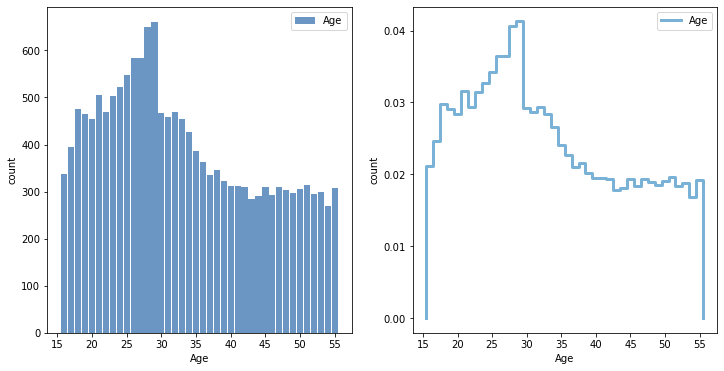

In [6]:
#Plotting the Histogram and pmf graphs below
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(histo)
thinkplot.Config(xlabel="Age", ylabel="count")
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Age", ylabel="count")

In [64]:
# Calculating the fraction of the people that are 51
count = 0.0
for i in df["Age"]:
    if i == 51:
        count += 1
frac = count / len(df["Age"])
print(frac)


0.01963481740870435


In [62]:
# Calculating the fraction older than 51?
count = 0.0
for i in df["Age"]:
    if i >= 51:
        count += 1
frac = count / len(df["Age"])
print(frac)


0.09285892946473237


In [7]:
#calculating the median age
df["Age"].median()

31.0

TASK 2 - DEMOGRAPHICS

INFERENCE: 

In comparison with the information on wikepedia about the dermographic of the USA, I would say that this data is a true representation of the US population. The figures are not exact but the distribution is similar. 

# citing some figures
non black/black percentage of the US population from wikepedia is 87.3/12.7 vs 92.7/7.2 from this data
non Hispanic/Hispanic percentage of the US population from wikepedia is 82.4/17.6 vs 93/7.2 from this data

below is the computation that led to my findings.

In [8]:
# Taking a look at the breakdown by percentages 
# for each unique value in the columns Education, Race, Hisp, Marital status, Nodeg

print(df.Eduacation.value_counts(1))
print(df.Race.value_counts(1))
print(df.Hisp.value_counts(1))
print(df.MaritalStatus.value_counts(1))
print(df.Nodeg.value_counts(1))


HighSchool            0.390945
LessThanHighSchool    0.295835
Intermediate          0.169335
graduate              0.085480
PostGraduate          0.058404
Name: Eduacation, dtype: float64
NotBlack    0.926463
black       0.073537
Name: Race, dtype: float64
NotHispanic    0.927964
hispanic       0.072036
Name: Hisp, dtype: float64
Married       0.711731
NotMarried    0.288269
Name: MaritalStatus, dtype: float64
0    0.704165
1    0.295835
Name: Nodeg, dtype: float64


TASK 3 - EARNINGS

A graph of my choosing  -  CDF

INFERENCE:
From the graph, is shows that Income pretty much stayed the same between 1974 and 1975 with a slight drop in 1978. Also, more people earned higher pay than lower pay and this was common accross all three years. 

In [9]:
#creating objects for my cdf graphs
cdf = thinkstats2.Cdf(round(df["Earnings_1974"], 0), label="Earnings1974")
cdf1 = thinkstats2.Cdf(round(df["Earnings_1975"], 0), label="Earnings1975")
cdf2 = thinkstats2.Cdf(round(df["Earnings_1978"], 0), label="Earnings1978")


{'xscale': 'linear', 'yscale': 'linear'}

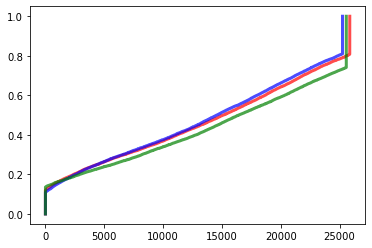

In [10]:
#ploting the cdf graph below
thinkplot.cdf(cdf, color = "red")
thinkplot.cdf(cdf1, color = "blue")
thinkplot.cdf(cdf2, color = "green")



MARITAL STATUS has the greatest effect size on the earning in 1978. 
below is an evaluation of the effect size of all four (Hispanic. Race, MaritalStatus and Node) on the earnings in 1978 using the cohen effect size computation.

In [18]:
#slicing the data into groups for use in comparison with the cohen effect size computation
hisp = df[df["Hisp"] == "Hispanic"]
nohisp = df[df["Hisp"] == "NotHispanic"]
race = df[df["Race"] == "Black"]
norace = df[df["Race"] == "NotBlack"]
marit = df[df["MaritalStatus"] == "Married"]
nomarit = df[df["MaritalStatus"] == "NotMarried"]
nodg = df[df["Nodeg"] == 1]
dg = df[df["Nodeg"] == 0]

In [12]:

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [19]:
#calculating the cohen effect size on Earning in 1978 for the different groups
print(CohenEffectSize(hisp["Earnings_1978"], nohisp["Earnings_1978"]))
print(CohenEffectSize(race["Earnings_1978"], norace["Earnings_1978"]))
print(CohenEffectSize(marit["Earnings_1978"], nomarit["Earnings_1978"]))
print(CohenEffectSize(nodg["Earnings_1978"], dg["Earnings_1978"]))

nan
nan
0.5737396692403472
-0.3367928897615812


TASK 4

o	Plot a histogram and PMF, and compute useful descriptive statistics for 1978 Earnings


In [46]:
#slicing the Earnings_1978 column and computing summary statistics
dfE = df["Earnings_1978"]
dfE.describe()

count    15992.000000
mean     14846.659673
std       9647.391524
min          0.000000
25%       5669.298000
50%      16421.975000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64

In [21]:
#For 1978 Earnings - Making Histogram and Pmf objects
histE = thinkstats2.Hist(round(df["Earnings_1978"],0), label="Earnings1978")
pmfE = thinkstats2.Pmf(round(df["Earnings_1978"], 0), label="Earnings1978")

C:\Users\Learning\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Earnings_1978', ylabel='Density'>

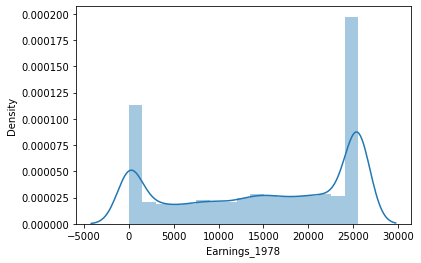

In [39]:
sns.distplot(df["Earnings_1978"])

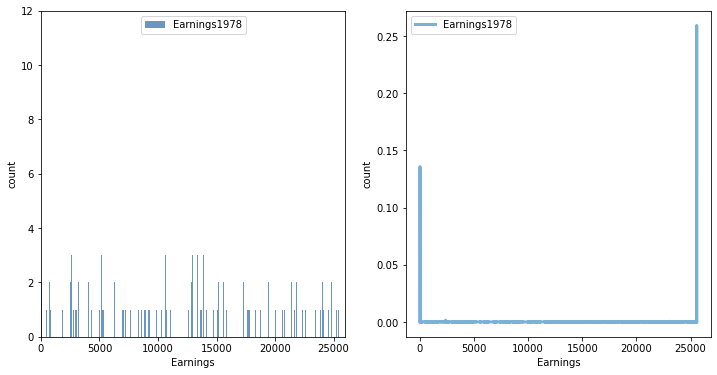

In [35]:
#Plotting the Histogram and pmf graphs below
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(histE)
thinkplot.Config(xlabel="Earnings", ylabel="count")
thinkplot.Config(xlim=[0, 26000], ylim=[0, 12])
thinkplot.SubPlot(2)
thinkplot.Pmf(pmfE)
thinkplot.Config(xlabel="Earnings", ylabel="count")
